In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import nltk
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import KeyedVectors

from keras.preprocessing.sequence import pad_sequences

%matplotlib inline

In [3]:
FILE_PATH = "/content/drive/MyDrive/MARATHI_WSD_Data/Marathi News Domain/new_text_marathi.TXT"

In [4]:
opened_file = open(FILE_PATH, "r", encoding="utf-8-sig")
content = opened_file.read()

In [5]:
sentences_with_pos = []
for i in content.split("\n"):
    if len(i)!=0 and i[0] != "<":
        sentences_with_pos.append(i)

In [6]:
all_sentences = []
all_sentence_pos = []
for sentence in sentences_with_pos:
    sent = []
    po = []
    for word in sentence.split(" "):
        x = word.split("_")
        if len(x)!=1:
            sent.append(word.split("_")[0])
            po.append(word.split("_")[1])
    all_sentences.append(sent)
    all_sentence_pos.append(po)

In [7]:
index = 900
print(' '.join(all_sentences[index]), len(all_sentences[index]))
print(' '.join(all_sentence_pos[index]), len(all_sentence_pos[index]))

सदानंद शेट्टी , शेख यांना अटक व सुटका मंगळवार पेठेतील रवींद्रनाथ टागोर विद्यालयासमोर सकाळी कॉंग्रेसचे उमेदवार सदानंद शेट्टी व इंडियन मुस्लिम फ्रंटचे कार्यकर्ते असीम बाबूमिया शेख यांच्यात धक्काबुक्की झाली . 30
NNPC NNP SYM NNP PRP NN CC NN NNPC NNP NNPC NNPC NNP NN NNP NN NNPC NNP CC NNPC NNPC NNP NN NNPC NNPC NNP PRP NN VM SYM 30


In [8]:
nouns_tag_set = {"NN", "NNP", "PRP", "NNC", "NNPC", "NVB"}
verbs_tag_set = {"VFM", "VAUX", "VJJ", "VRB", "VNN"}
adverbs_tag_set = {"RB", "RBVB"}
adjectives_tag_set = {"JJ", "JVB"}

In [9]:
for pos in all_sentence_pos[index]:
    if pos in nouns_tag_set:
        print("n", end = " ")
    elif pos in verbs_tag_set:
        print("v", end = " ")
    elif pos in adverbs_tag_set:
        print("r", end = " ")
    elif pos in adjectives_tag_set:
        print("a", end = " ")
    else:
        print("u", end = " ")

n n u n n n u n n n n n n n n n n n u n n n n n n n n n u u 

In [10]:
replaced_pos_tags = []
for sentence_pos in all_sentence_pos:
    pos_list = []
    for pos in sentence_pos:
        if pos in nouns_tag_set:
            x = "n"
        elif pos in verbs_tag_set:
            x = "v"
        elif pos in adverbs_tag_set:
            x = "r"
        elif pos in adjectives_tag_set:
            x = "a"
        else:
            x = "u"
        pos_list.append(x)
    replaced_pos_tags.append(pos_list)

In [11]:
print(' '.join(replaced_pos_tags[index]))

n n u n n n u n n n n n n n n n n n u n n n n n n n n n u u


In [12]:
all_pos = []
for sentence_pos in replaced_pos_tags:
    for pos in sentence_pos:
        all_pos.append(pos)

In [13]:
total_pos = set(all_pos)
print(total_pos, len(total_pos))

{'a', 'r', 'u', 'v', 'n'} 5


In [14]:
corpus = []
for sentence in all_sentences:
    for word in sentence:
        corpus.append(word)

In [15]:
print(f"Number of Sentences: {len(all_sentences)}")
print(f"Vocabulary Size: {len(set(corpus))}")
print(f"Total Tags: {len(set(all_pos))}")

Number of Sentences: 957
Vocabulary Size: 5734
Total Tags: 5


In [16]:
MAX_LENGTH = max([len(sentence) for sentence in all_sentences])
print(MAX_LENGTH)

129


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


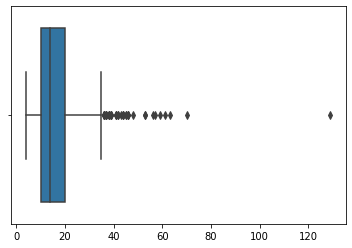

In [17]:
sns.boxplot([len(sentence) for sentence in all_sentences])
plt.show()

In [18]:
word_index = {word: i+2 for i,word in enumerate(list(set(corpus)))}
tag_index = {tag: i+1 for i,tag in enumerate(list(set(all_pos)))}

In [19]:
all_sentences_numeric = []
all_tags_numeric = []
for i in range(len(all_sentences)):
    sent = []
    tag = []
    for word in all_sentences[i]:
        sent.append(word_index[word])
    for t in replaced_pos_tags[i]:
        tag.append(tag_index[t])
    all_sentences_numeric.append(sent)
    all_tags_numeric.append(tag)

In [20]:
MAX_LENGTH = max([len(sentence) for sentence in all_sentences])
print(MAX_LENGTH)

129


In [21]:
sentences_padded = pad_sequences(all_sentences_numeric, maxlen=MAX_LENGTH, padding="pre", truncating="post")
tags_padded = pad_sequences(all_tags_numeric, maxlen=MAX_LENGTH, padding="pre", truncating="post")

In [22]:
print(sentences_padded[0])
print(tags_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 1947
 2721 3081  658 1039 4114 2355 3503 5158 4783 2939  726  239 4884 2848
 2747 3374 2355 5282 4261 4783 2355 2928 4884 2848 2029 2580  292 1282
  322 2487 1981]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 5 5 5 3 5 5 5 5 3 5 5 5 5
 5 5 5 5 5 5 3 5 5 5 5 5 5 5 1 3 4 3]


In [23]:
word_index["_PAD_"] = 0
word_index["_OOV_"] = 1

tag_index["_PAD_"] = 0

In [24]:
sentences_padded.shape, tags_padded.shape

((957, 129), (957, 129))

In [25]:
from keras.utils import to_categorical

In [26]:
y = to_categorical(tags_padded)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences_padded, y, test_size=0.2, random_state = 24)

In [28]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (765, 129), (765, 129, 6)
Test Data: (192, 129), (192, 129, 6)


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed, Activation

In [30]:
VOCAB_SIZE = len(word_index)
NUM_CLASSES = len(tag_index)

In [31]:
model = Sequential()

model.add(Embedding(
    input_dim = VOCAB_SIZE,
    output_dim = 256,
    input_length = MAX_LENGTH
))

model.add(Bidirectional(LSTM(512, return_sequences=True)))

model.add(TimeDistributed(Dense(NUM_CLASSES, activation="softmax")))

In [32]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 129, 256)          1468416   
_________________________________________________________________
bidirectional (Bidirectional (None, 129, 1024)         3149824   
_________________________________________________________________
time_distributed (TimeDistri (None, 129, 6)            6150      
Total params: 4,624,390
Trainable params: 4,624,390
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=60
)

Epoch 1/60
6/6 [==============================] - 11s 324ms/step - loss: 1.2447 - accuracy: 0.5591 - val_loss: 0.2538 - val_accuracy: 0.8792
Epoch 2/60
6/6 [==============================] - 1s 128ms/step - loss: 0.2661 - accuracy: 0.8991 - val_loss: 0.2266 - val_accuracy: 0.9237
Epoch 3/60
6/6 [==============================] - 1s 127ms/step - loss: 0.2212 - accuracy: 0.9261 - val_loss: 0.1740 - val_accuracy: 0.9281
Epoch 4/60
6/6 [==============================] - 1s 127ms/step - loss: 0.1802 - accuracy: 0.9272 - val_loss: 0.1644 - val_accuracy: 0.9388
Epoch 5/60
6/6 [==============================] - 1s 127ms/step - loss: 0.1639 - accuracy: 0.9396 - val_loss: 0.1543 - val_accuracy: 0.9316
Epoch 6/60
6/6 [==============================] - 1s 128ms/step - loss: 0.1580 - accuracy: 0.9347 - val_loss: 0.1511 - val_accuracy: 0.9397
Epoch 7/60
6/6 [==============================] - 1s 126ms/step - loss: 0.1557 - accuracy: 0.9374 - val_loss: 0.1498 - val_accuracy: 0.9356
Epoch 8/60
6/6 [===

In [35]:
def preprocess_input_text(text, MAXLEN=MAX_LENGTH,word_index=word_index):
    sentence = text.split(" ")
    sentence_numeric = []
    for word in sentence:
        try:
            sentence_numeric.append(word_index[word])
        except:
            sentence_numeric.append(word_index["_OOV_"])
    sentence_numeric = pad_sequences([sentence_numeric], maxlen=MAXLEN, padding="pre",truncating="post")
    return sentence_numeric.reshape((MAX_LENGTH,))

In [36]:
test_sentence = preprocess_input_text("सदानंद शेट्टी , शेख यांना अटक व सुटका मंगळवार पेठेतील रवींद्रनाथ टागोर विद्यालयासमोर सकाळी कॉंग्रेसचे उमेदवार सदानंद शेट्टी व इंडियन मुस्लिम फ्रंटचे कार्यकर्ते असीम बाबूमिया शेख यांच्यात धक्काबुक्की झाली .")

In [37]:
for pos in model.predict(test_sentence):
    print(np.argmax(pos), end = " ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 3 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 3 3 

In [38]:
import pickle

In [39]:
pickle.dump(word_index, open("news_word_index.pkl","wb"))
pickle.dump(tag_index, open("news_tag_index.pkl", "wb"))

In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("news_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("news_model_weights.h5")
print("Saved model to disk")

Saved model to disk
